In [15]:
import numpy as np
import networkx as nx
from node2vec import Node2Vec
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

sns.set_style('whitegrid')
plt.rcParams.update({'font.size' : 13})

<img src="metro.jpg" style="width: 600px;"/>

In [16]:
red = ['Парк Культуры Красная', 'Кропоткинская', 'Библиотека Им. Ленина', 'Охотный Ряд',
       'Лубянка', 'Чистые Пруды', 'Красные Ворота', 'Комсомольская Красная']
orange = ['Октябрьская Оранжевая', 'Третьяковская Оранжевая', 'Китай-Город Оранжевая',
          'Тургеневская', 'Сухаревская', 'Проспект Мира Оранжевая']
grey = ['Серпуховская', 'Полянка', 'Боровицкая', 'Чеховская', 'Цветной Бульвар', 'Менделеевская']
green = ['Павелецкая Зеленая', 'Новокузнецкая', 'Театральная', 'Тверская', 'Маяковская', 'Белорусская Зеленая']
purple = ['Таганская Фиолетовая', 'Китай-Город Фиолетовая', 'Кузнецкий Мост', 'Пушкинская', 'Баррикадная']
blue = ['Курская Синяя', 'Площадь Революции', 'Арбатская Синяя', 'Смоленская', 'Киевская Синяя']
circle = ['Парк Культуры Кольцевая', 'Октябрьская Кольцевая', 'Добрынинская', 'Павелецкая Кольцевая',
          'Таганская Кольцевая', 'Курская Кольцевая', 'Комсомольская Кольцевая', 'Проспект Мира Кольцевая',
         'Новослободская', 'Белорусская Кольцевая', 'Краснопресненская', 'Киевская Кольцевая']

lines = [red, orange, grey, green, purple, blue, circle]
graph = nx.Graph()

In [17]:
for line in lines:
    graph.add_node(line[0])
    for i in range(len(line) - 1):
        graph.add_node(line[i + 1])
        graph.add_edge(line[i], line[i + 1])
graph.add_edge(circle[0], circle[-1])

In [18]:
graph.add_edge('Парк Культуры Красная', 'Парк Культуры Кольцевая')
graph.add_edge('Октябрьская Оранжевая', 'Октябрьская Кольцевая')
graph.add_edge('Серпуховская', 'Добрынинская')
graph.add_edge('Павелецкая Зеленая', 'Павелецкая Кольцевая')
graph.add_edge('Таганская Фиолетовая', 'Таганская Кольцевая')
graph.add_edge('Курская Синяя', 'Курская Кольцевая')
graph.add_edge('Комсомольская Красная', 'Комсомольская Кольцевая')
graph.add_edge('Проспект Мира Оранжевая', 'Проспект Мира Кольцевая')
graph.add_edge('Менделеевская', 'Новослободская')
graph.add_edge('Белорусская Зеленая', 'Белорусская Кольцевая')
graph.add_edge('Баррикадная', 'Краснопресненская')
graph.add_edge('Киевская Синяя', 'Киевская Кольцевая')

In [19]:
graph.add_edge('Чистые Пруды', 'Тургеневская')
graph.add_edge('Лубянка', 'Кузнецкий Мост')
graph.add_edge('Охотный Ряд', 'Театральная')
graph.add_edge('Площадь Революции', 'Театральная')
graph.add_edge('Чеховская', 'Пушкинская')
graph.add_edge('Чеховская', 'Тверская')
graph.add_edge('Пушкинская', 'Тверская')
graph.add_edge('Китай-Город Оранжевая', 'Китай-Город Фиолетовая')
graph.add_edge('Третьяковская Оранжевая', 'Новокузнецкая')
graph.add_edge('Библиотека Им. Ленина', 'Боровицкая')
graph.add_edge('Библиотека Им. Ленина', 'Арбатская Синяя')
graph.add_edge('Боровицкая', 'Арбатская Синяя')

In [20]:
node2vec = Node2Vec(graph, dimensions=3, num_walks=500, walk_length=10, p=2, q=1)
model = node2vec.fit()

Generating walks (CPU: 1): 100%|██████████| 500/500 [00:10<00:00, 45.83it/s]


In [23]:
embeddings = np.array([model.wv[station] for station in sorted(graph.nodes)])
embeddings_2d = TSNE(n_components=2).fit_transform(embeddings)
mapping = dict(zip(sorted(graph.nodes), embeddings_2d))

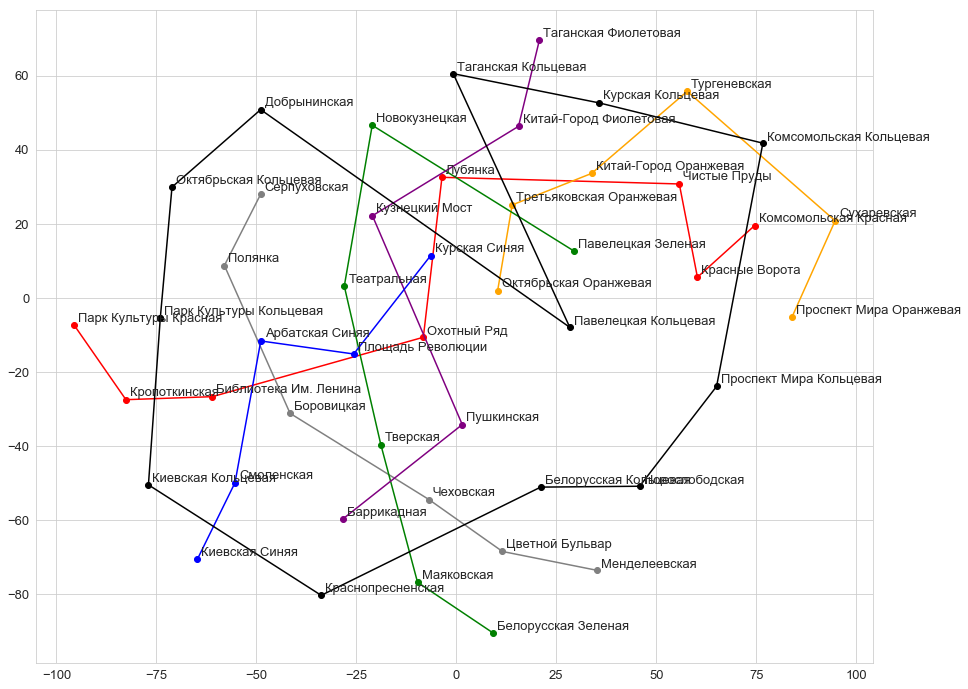

In [25]:
colors = ['red', 'orange', 'grey', 'green', 'purple', 'blue', 'black']
plt.figure(figsize=(15, 12))
for i, line in enumerate(lines):
    vectors = np.zeros((len(line), 2))
    for j, station in enumerate(line):
        vectors[j] = mapping[station]
        plt.annotate(station, mapping[station] + 1)
    if colors[i] == 'black':
        vectors = np.concatenate((vectors, vectors[0].reshape(1, 2)))
    plt.plot(vectors[:, 0], vectors[:, 1], color=colors[i], marker='o')

In [26]:
base = 'Чистые Пруды'
dot_products = dict()
for line in lines:
    for station in line:
        dot_products[station] = model.wv[base] @ model.wv[station]

In [27]:
norm = np.exp(np.array(list(dot_products.values()))).sum()
probabilities = dict(zip(sorted(dot_products.keys()),
                        [np.exp(dot_products[station]) / norm for station in sorted(dot_products.keys())]))
probabilities = {key: value for key, value in sorted(probabilities.items(), key=lambda item: -item[1])}

In [28]:
probabilities

{'Красные Ворота': 0.4327267,
 'Сухаревская': 0.24893948,
 'Комсомольская Красная': 0.16107574,
 'Проспект Мира Оранжевая': 0.14498621,
 'Тургеневская': 0.006639545,
 'Чистые Пруды': 0.003376735,
 'Проспект Мира Кольцевая': 0.0013277367,
 'Комсомольская Кольцевая': 0.00074737554,
 'Таганская Фиолетовая': 9.883913e-05,
 'Китай-Город Оранжевая': 6.0675822e-05,
 'Китай-Город Фиолетовая': 1.0707079e-05,
 'Курская Кольцевая': 5.2586993e-06,
 'Таганская Кольцевая': 4.14761e-06,
 'Новослободская': 4.1386764e-07,
 'Лубянка': 2.5376727e-07,
 'Третьяковская Оранжевая': 5.713732e-08,
 'Кузнецкий Мост': 5.0266625e-08,
 'Менделеевская': 3.696254e-08,
 'Курская Синяя': 2.8286452e-08,
 'Павелецкая Зеленая': 1.6349226e-08,
 'Павелецкая Кольцевая': 7.420729e-09,
 'Новокузнецкая': 4.225191e-09,
 'Цветной Бульвар': 1.025857e-09,
 'Охотный Ряд': 3.365653e-10,
 'Театральная': 2.360152e-10,
 'Площадь Революции': 1.512377e-10,
 'Пушкинская': 1.08150086e-10,
 'Октябрьская Оранжевая': 1.00190176e-10,
 'Белорус